# Мировые рейтинги университетов

Поломарчук Максим Андреевич || ММР212 || mapolomarchuk@edu.hse.ru

[Датасет](https://www.kaggle.com/datasets/mylesoneill/world-university-rankings?resource=download)

Столбцы:
1. world_rank, int64, Мировой рейтинг 
2. institution, object, Название
3. country, object, Страна
4. national_rank, int64, Национальный рейтинг
5. quality_of_education, int64, Качество образования
6. alumni_employment, int64, Уровень трудоустройства
7. quality_of_faculty, int64, Качество преподователей
8. publications, int64, Публикации
9. influence, int64, Котируемость
10. citations, int64, Цитируемость
11. broad_impact, float64, Широта воздействия
12. patents, int64, Патенты
13. score, float64, Совокупный рейтинг
14. year, int64, Год

# Импорт библиотек / Описательный анализ датасета / Нормализация данных

Для начала импортируем необходимые для работы библиотеки

In [1]:
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import numpy as np
import seaborn as sns

Производим чтение датасета в расширении ".csv". Анализируемый датасет уже разделен запятыми, использовать "sep" не нужно. Выводим первые пять строк датасета.

In [2]:
df_uni =  pd.read_csv('df_uni.csv')
df_uni[:5]

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


Выведем информацию о строках и столбцах нашего датасета.

In [3]:
df_uni.shape

(2200, 14)

Из информации выше видно, что наш датасет вмещает в себя 2200 строк и 14 столбцов.

Вывожу полную информацию о колонках датасета, чтобы проверить, есть ли какие-то аномалии. Замечаю, что колонка "broad_impact" имеет пропуски.

In [4]:
df_uni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   world_rank            2200 non-null   int64  
 1   institution           2200 non-null   object 
 2   country               2200 non-null   object 
 3   national_rank         2200 non-null   int64  
 4   quality_of_education  2200 non-null   int64  
 5   alumni_employment     2200 non-null   int64  
 6   quality_of_faculty    2200 non-null   int64  
 7   publications          2200 non-null   int64  
 8   influence             2200 non-null   int64  
 9   citations             2200 non-null   int64  
 10  broad_impact          2000 non-null   float64
 11  patents               2200 non-null   int64  
 12  score                 2200 non-null   float64
 13  year                  2200 non-null   int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 240.8+ KB


Исходя из предварительного анализа принимаю решение удалить столбец broad_impact, поскольку он имеет незначащие NaN ячейки. Вывожу первую строку датасета, чтобы убедиться в успешном удалении столбца.

In [5]:
df_uni.drop(columns = 'broad_impact', axis = 1, inplace = True)
df_uni[:1]

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,5,100.0,2012


Для удобства дальнейшей работы, переименовываю названия столбцов.

In [6]:
df_uni_columns = ['Мировой рейтинг', 'Название', 'Страна', 'Национальный рейтинг', 'Качество образования',
                  'Уровень трудоустройства', 'Качество преподавателей', 'Публикации', 'Котируемость',
                  'Цитируемость', 'Патенты', 'Совокупный рейтинг', 'Год']

In [7]:
df_uni.columns = df_uni_columns
df_uni[:1]

,Мировой рейтинг,Название,Страна,Национальный рейтинг,Качество образования,Уровень трудоустройства,Качество преподавателей,Публикации,Котируемость,Цитируемость,Патенты,Совокупный рейтинг,Год
0,1,Harvard University,USA,1,7,9,1,1,1,1,5,100.0,2012


Проверяю разброс максимального и минимального значения по совокупному рейтингу среди мировых вузов.

In [8]:
df_uni['Совокупный рейтинг'].sort_values(ascending = False)

0       100.00
100     100.00
200     100.00
1200    100.00
201      99.09
         ...  
95       43.88
96       43.79
97       43.77
98       43.47
99       43.36
Name: Совокупный рейтинг, Length: 2200, dtype: float64

# Статистический анализ

Пытаюсь определить распределение величин столбца "Совокупный рейтинг" построив гистаграмму распределения.

<AxesSubplot:>

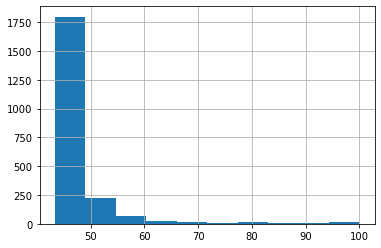

In [9]:
df_uni['Совокупный рейтинг'].hist()

График распределения величин показал, что большинство мировых вузов имеют совокупный рейтинг менее 50 баллов. По предварительному осмотру становится очевидно, что распределение величин является геометрическим.

Определим, в каких странах больше всего вузов с высоким рейтингом (от 80 баллов), а также страны, где больше всего вузов с низким рейтингом (ниже 50 баллов).

In [10]:
countries = df_uni['Страна'].value_counts()
countries.shape

(59,)

В датасете представлена информация о рейтингах вузов по 59 странам. Построим график количества вузов в разрезе стран.

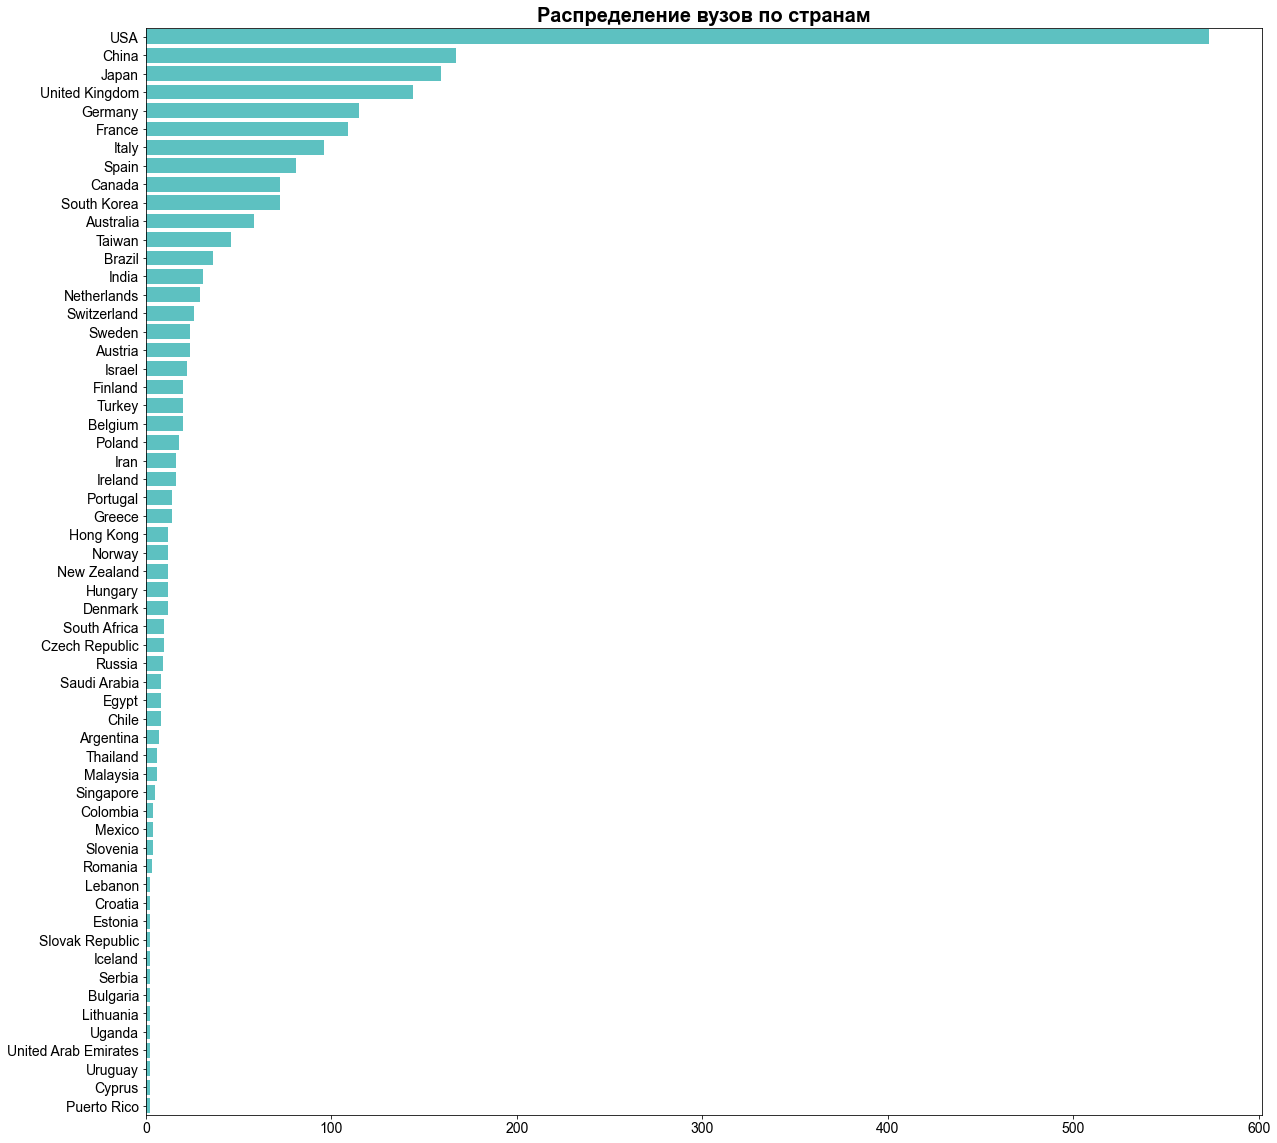

In [11]:
plt.figure(figsize = (20,20)) #размер графика
plt.title('Распределение вузов по странам', fontsize = 20, fontweight = 'bold')
plt.tick_params(labelsize = 14) #текст осей
sns.barplot(y = countries.index, x = countries.values, color = 'c', alpha = 0.7)
sns.set(font = 'Times New Roman')

Как можно заметить на графике, больше всего вузов, которые рассматриваются в датасете, находятся в США, меньше всего в Пуэрто-Рико. Построим график распределения вузов, которые имеют высокий общий рейтинг (от 80 баллов) по странам.

Из инетересного на графике выше, можно отметить, что у Канады и Южной Кореи практически одинаковое количество вузов. Если брать во внимание географические объемы этих стран, то получается интересный вывод. Канада - вторая по площади страна во всем мире имеет столько же вузов, сколько и во много раз более маленькая Южная Корея.

Провел фильтрацию датафрейма по университетам, совокупный рейтинг которых больше 80 баллов.

In [12]:
countries_max_rate = df_uni[df_uni['Совокупный рейтинг'] >= 80]
countries_max = countries_max_rate.sort_values(by = 'Совокупный рейтинг', ascending = False)
countries_max = countries_max_rate['Страна'].value_counts()
countries_max

USA               31
United Kingdom     8
Japan              1
Name: Страна, dtype: int64

По отфильтрованному датафрейму можно сделать вывод, что в топ стран по расположению самых рейтинговых вузов (средний бал больше 80 единиц), попало всего три страны: США, Великобритания и Япония.

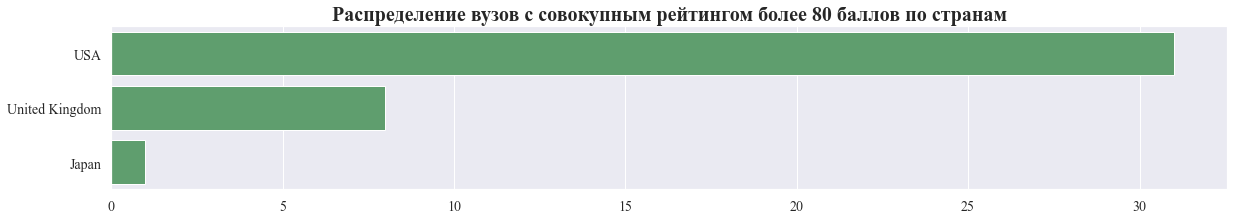

In [13]:
plt.figure(figsize = (20,3)) #размер графика
plt.title('Распределение вузов с совокупным рейтингом более 80 баллов по странам',\
          fontsize = 20, fontweight = 'bold')
plt.tick_params(labelsize = 14) #текст осей
sns.barplot(y = countries_max.index, x = countries_max.values, color = 'g', alpha = 1)
sns.set(font = 'Times New Roman')

Данный график показывает распределение самых топовых вузов в зависимости от стран. На гистограмме видно, что 31 высокорейтинговый вуз находятся в США. В Великобритании подобных вузов меньше, всего 8 штук. В Японии один вуз с рейтингом более 80 баллов.

Это график позволил сделать интересный вывод о рейтинге стран с топовыми вузами. Однкао куда интереснее посмотреть, где больше всего находится низкорейтинговых вузов, которые имеют совокупный рейтинг менее 50 баллов. Построим соответсвуйщий график, чтобы это оценить.

In [14]:
countries_min_rate = df_uni[df_uni['Совокупный рейтинг'] <= 50]
countries_min = countries_min_rate.sort_values(by = 'Совокупный рейтинг', ascending = False)
countries_min = countries_min_rate['Страна'].value_counts()
countries_min.shape

(59,)

На данный момент видно, что в отфильтрованный список низкорейтинговых вузов попали все те же страны, что и в общем датасете. Это говорит о том, что как минимум один низкорейтинговый вуз находится в каждой представленной стране.

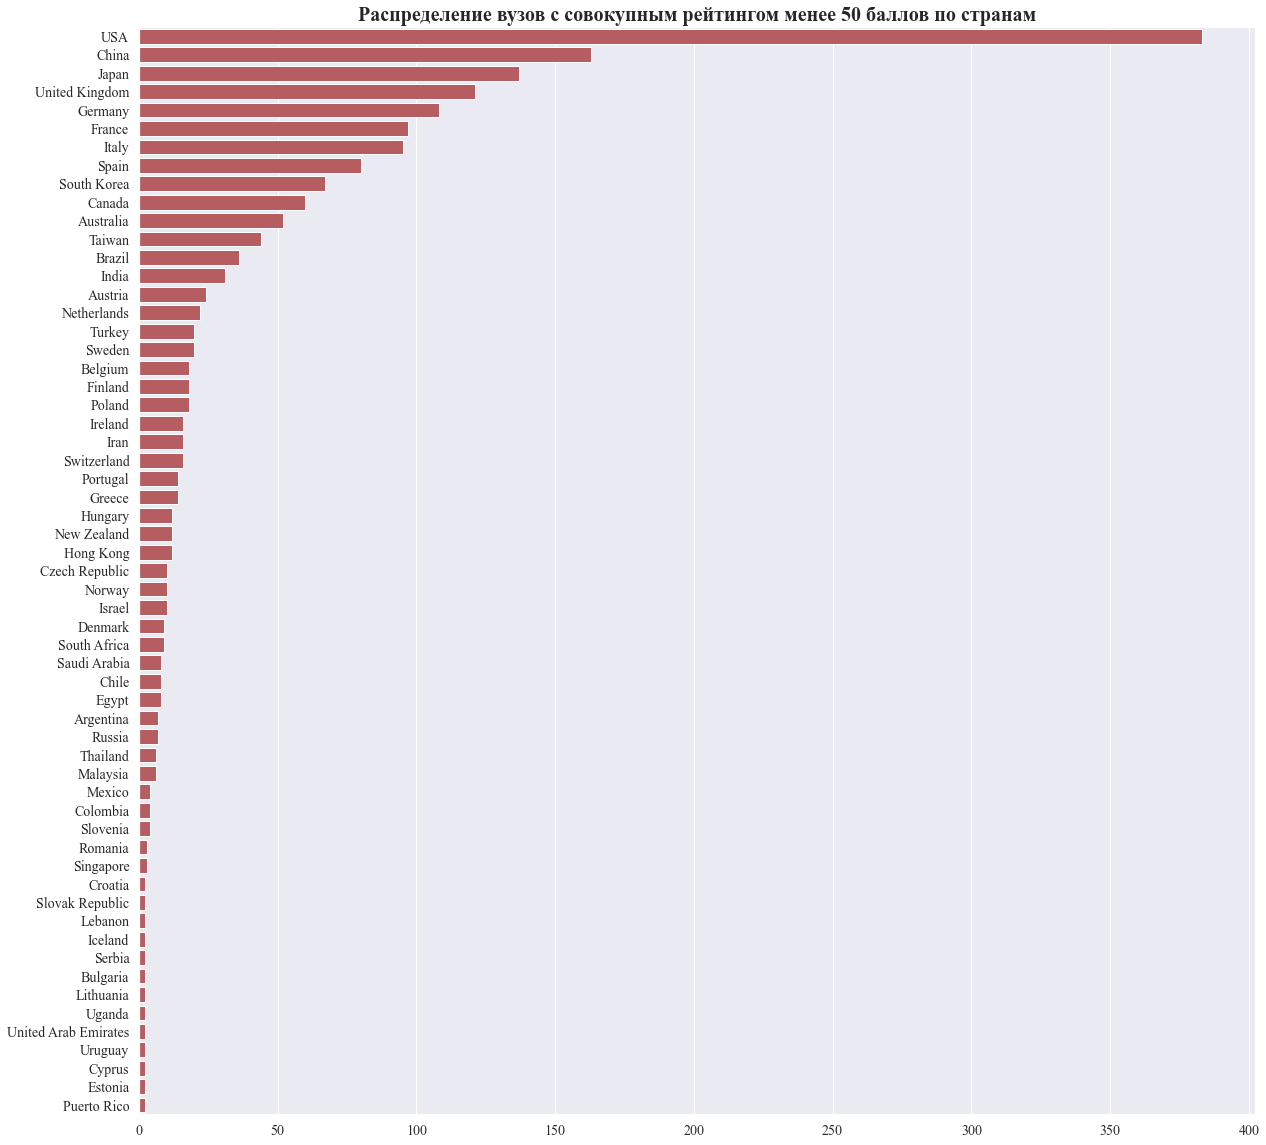

In [15]:
plt.figure(figsize = (20,20)) #размер графика
plt.title('Распределение вузов с совокупным рейтингом менее 50 баллов по странам',\
          fontsize = 20, fontweight = 'bold')
plt.tick_params(labelsize = 14) #текст осей
sns.barplot(y = countries_min.index, x = countries_min.values, color = 'r', alpha = 1)
sns.set(font = 'Times New Roman')

Определим новую переменную "Статус по рейтингу", которая будет повторять значения столбца "Совокупный рейтинг" с дальнейшим перекодированием столбца в категориальную переменную.

# Категорирование

In [16]:
df_uni['Статус по рейтингу'] = df_uni['Совокупный рейтинг']
df_uni[:1]

,Мировой рейтинг,Название,Страна,Национальный рейтинг,Качество образования,Уровень трудоустройства,Качество преподавателей,Публикации,Котируемость,Цитируемость,Патенты,Совокупный рейтинг,Год,Статус по рейтингу
0,1,Harvard University,USA,1,7,9,1,1,1,1,5,100.0,2012,100.0


Поменяем столбцы местами, чтобы столбец "Статус по рейтингу" был рядом со столбцом "Совокупный рейтинг" для наглядности.

In [17]:
df_uni = pd.DataFrame(df_uni, columns=['Мировой рейтинг', 'Название', 'Страна', 'Национальный рейтинг',
                                       'Качество образования', 'Уровень трудоустройства',
                                       'Качество преподавателей', 'Публикации', 'Котируемость', 'Цитируемость',
                                       'Патенты', 'Совокупный рейтинг', 'Статус по рейтингу','Год'])
df_uni[:1]

,Мировой рейтинг,Название,Страна,Национальный рейтинг,Качество образования,Уровень трудоустройства,Качество преподавателей,Публикации,Котируемость,Цитируемость,Патенты,Совокупный рейтинг,Статус по рейтингу,Год
0,1,Harvard University,USA,1,7,9,1,1,1,1,5,100.0,100.0,2012


Приступим к кодировке столбца относительно совокупного рейтинга вуза.
- более 80 баллов - высокий рейтинг
- от 51 до 79 - средний рейтинг
- менее 50 баллов - низкий рейтинг

Используем функцию, т.к. будет использоваться несколько условий.

In [18]:
def cat_stat(cat):
    if cat < 50:
        return 'Низкий рейтинг'
    elif cat < 80:
        return 'Средний рейтинг'
    elif cat <= 100:
        return 'Высокий рейтинг'
    else:
        return cat

Присваиваем значения функции в категориальную переменную "Статус по рейтингу".

In [19]:
df_uni['Статус по рейтингу'] = df_uni['Совокупный рейтинг'].apply(cat_stat)
df_uni[:60]

,Мировой рейтинг,Название,Страна,Национальный рейтинг,Качество образования,Уровень трудоустройства,Качество преподавателей,Публикации,Котируемость,Цитируемость,Патенты,Совокупный рейтинг,Статус по рейтингу,Год
0,1,Harvard University,USA,1,7,9,1,1,1,1,5,100.00,Высокий рейтинг,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,1,91.67,Высокий рейтинг,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,15,89.50,Высокий рейтинг,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,50,86.17,Высокий рейтинг,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,18,85.21,Высокий рейтинг,2012
5,6,Princeton University,USA,5,8,14,2,53,33,26,101,82.50,Высокий рейтинг,2012
6,7,University of Oxford,United Kingdom,2,13,28,9,15,13,19,26,82.34,Высокий рейтинг,2012
7,8,Yale University,USA,6,14,31,12,14,6,15,66,79.14,Средний рейтинг,2012
8,9,Columbia University,USA,7,23,21,10,13,12,14,5,78.86,Средний рейтинг,2012
9,10,"University of California, Berkeley",USA,8,16,52,6,6,5,3,16,78.55,Средний рейтинг,2012


In [20]:
df_uni['Статус по рейтингу'].value_counts(normalize = True)

Низкий рейтинг     0.849091
Средний рейтинг    0.132727
Высокий рейтинг    0.018182
Name: Статус по рейтингу, dtype: float64

- 85% вузов имеют низкий рейтинг
- 13% вузов имеют средний рейтинг
- 2% вузов имеют высокий рейтинг

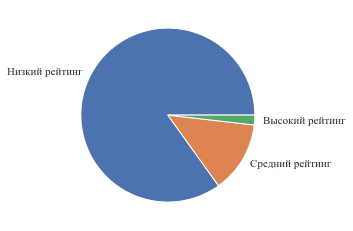

In [21]:
plt.pie(df_uni['Статус по рейтингу'].value_counts(),
        labels = ["Низкий рейтинг", "Средний рейтинг", "Высокий рейтинг"])
plt.show()

Как можно заметить по круговой диаграмме, низкорейтинговые вузы превалируют над среднерейтинговыми и высокорейтинговыми вузами вместе взятыми.

# Обработка выбросов

In [22]:
df_uni.describe()

,Мировой рейтинг,Национальный рейтинг,Качество образования,Уровень трудоустройства,Качество преподавателей,Публикации,Котируемость,Цитируемость,Патенты,Совокупный рейтинг,Год
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,459.590909,40.278182,275.100455,357.116818,178.888182,459.908636,459.797727,413.417273,433.346364,47.798395,2014.318182
std,304.320363,51.740870,121.935100,186.779252,64.050885,303.760352,303.331822,264.366549,273.996525,7.760806,0.762130
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,43.360000,2012.000000
25%,175.750000,6.000000,175.750000,175.750000,175.750000,175.750000,175.750000,161.000000,170.750000,44.460000,2014.000000
50%,450.500000,21.000000,355.000000,450.500000,210.000000,450.500000,450.500000,406.000000,426.000000,45.100000,2014.000000
75%,725.250000,49.000000,367.000000,478.000000,218.000000,725.000000,725.250000,645.000000,714.250000,47.545000,2015.000000
max,1000.000000,229.000000,367.000000,567.000000,218.000000,1000.000000,991.000000,812.000000,871.000000,100.000000,2015.000000


Как можно заметить из описания датасета, все ячейки столбцов представляют рейтинг вуза в зависимости от параметра столбца. То есть данные не выражаются в каких-то измеримых системах исчисления, данные являются рейтинговыми единицами.

Поэтому считаю необходимым построить корреляционную матрицу, чтобы определить взаимосвязи между данными.

Но перед этим необходимо проверить наличие выбросов в данных. Для этого воспользуемся графиками boxplot.

Text(0.5, 0.98, 'Проверка данных на наличие выбросов')

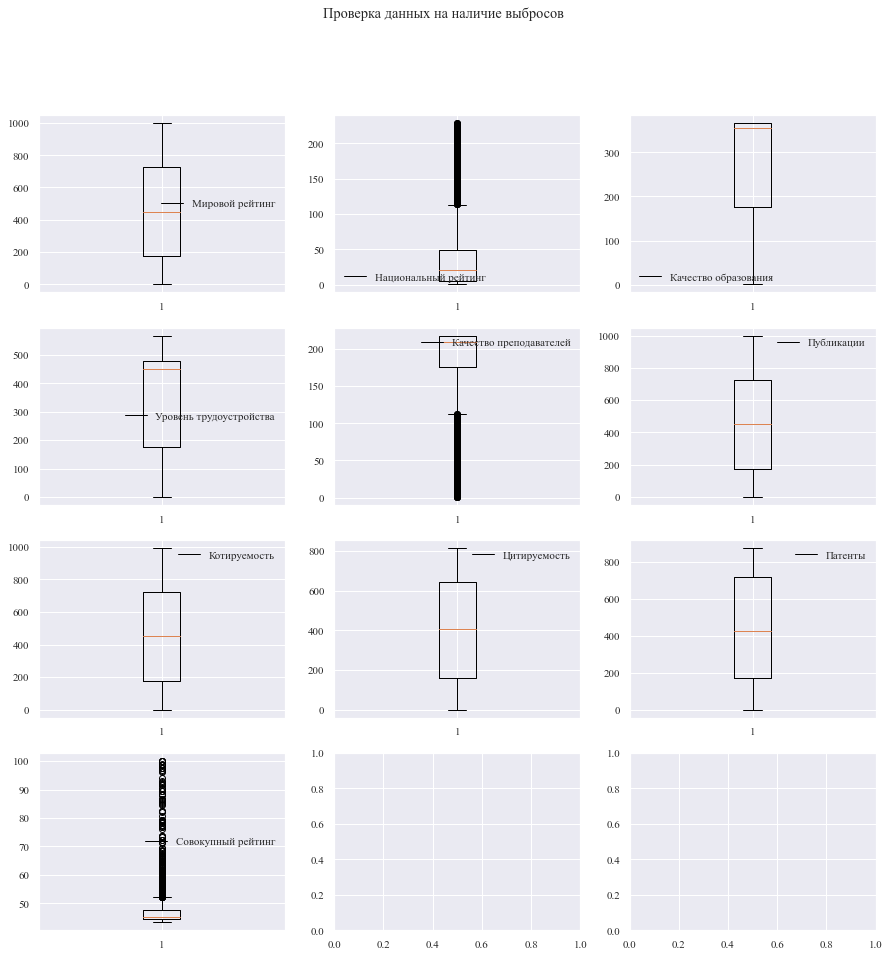

In [23]:
fig, ax = plt.subplots(4,3, figsize=(15,15))

ax[0][0].boxplot(df_uni['Мировой рейтинг'])
ax[0][1].boxplot(df_uni['Национальный рейтинг'])
ax[0][2].boxplot(df_uni['Качество образования'])
ax[1][0].boxplot(df_uni['Уровень трудоустройства'])
ax[1][1].boxplot(df_uni['Качество преподавателей'])
ax[1][2].boxplot(df_uni['Публикации'])
ax[2][0].boxplot(df_uni['Котируемость'])
ax[2][1].boxplot(df_uni['Цитируемость'])
ax[2][2].boxplot(df_uni['Патенты'])
ax[3][0].boxplot(df_uni['Совокупный рейтинг'])

ax[0][0].legend(['Мировой рейтинг'], frameon=False)
ax[0][1].legend(['Национальный рейтинг'], frameon=False)
ax[0][2].legend(['Качество образования'], frameon=False)
ax[1][0].legend(['Уровень трудоустройства'], frameon=False)
ax[1][1].legend(['Качество преподавателей'], frameon=False)
ax[1][2].legend(['Публикации'], frameon=False)
ax[2][0].legend(['Котируемость'], frameon=False)
ax[2][1].legend(['Цитируемость'], frameon=False)
ax[2][2].legend(['Патенты'], frameon=False)
ax[3][0].legend(['Совокупный рейтинг'], frameon=False)

fig.suptitle('Проверка данных на наличие выбросов')

По графику видно, что в нашем датасете присутствует небольшое количество выбросов.

Оценим количество выбросов по каждому описанному столбцу при помощи СКО отклонения от среднего значения на 3 сигмы.

Производим поиск выбросов для столбца "Национальный рейтинг".

In [24]:
limit_bottom_nat_rate = df_uni['Национальный рейтинг'].mean() - 3 * df_uni['Национальный рейтинг'].std()
limit_top_nat_rate = df_uni['Национальный рейтинг'].mean() + 3 * df_uni['Национальный рейтинг'].std()
print(limit_bottom_nat_rate, limit_top_nat_rate)

-114.94442934158076 195.5007929779444


In [25]:
df_uni[df_uni['Национальный рейтинг'] < limit_bottom_nat_rate].shape

(0, 14)

In [26]:
df_uni[df_uni['Национальный рейтинг'] > limit_top_nat_rate].shape

(68, 14)

Исключим выбросы в столбце. Повторим эту процедуру с оставшимися переменными.

In [27]:
df_uni = df_uni[df_uni['Национальный рейтинг'] < limit_top_nat_rate]
df_uni.shape

(2132, 14)

In [28]:
limit_bottom_all_rate = df_uni['Совокупный рейтинг'].mean() - 3 * df_uni['Совокупный рейтинг'].std()
limit_top_all_rate = df_uni['Совокупный рейтинг'].mean() + 3 * df_uni['Совокупный рейтинг'].std()
print(limit_bottom_all_rate, limit_top_all_rate)

24.32969970130386 71.48492506417455


In [29]:
df_uni[df_uni['Совокупный рейтинг'] < limit_bottom_all_rate].shape

(0, 14)

In [30]:
df_uni[df_uni['Совокупный рейтинг'] > limit_top_all_rate].shape

(61, 14)

Исключим выбросы в столбце.

In [31]:
df_uni = df_uni[df_uni['Совокупный рейтинг'] < limit_top_all_rate]
df_uni.shape

(2071, 14)

Для наглядности и упрощенного визаульного понимания структуры кода, убрал проверки тех столбцов, которые оказались без выбросов.

# Поиск взаимосвязей между переменными

Построим тепловую карту коэффициентов корреляции, чтобы определить взаимосвязи между переменными.

<AxesSubplot:title={'center':'Карта коэффициентов корреляции'}>

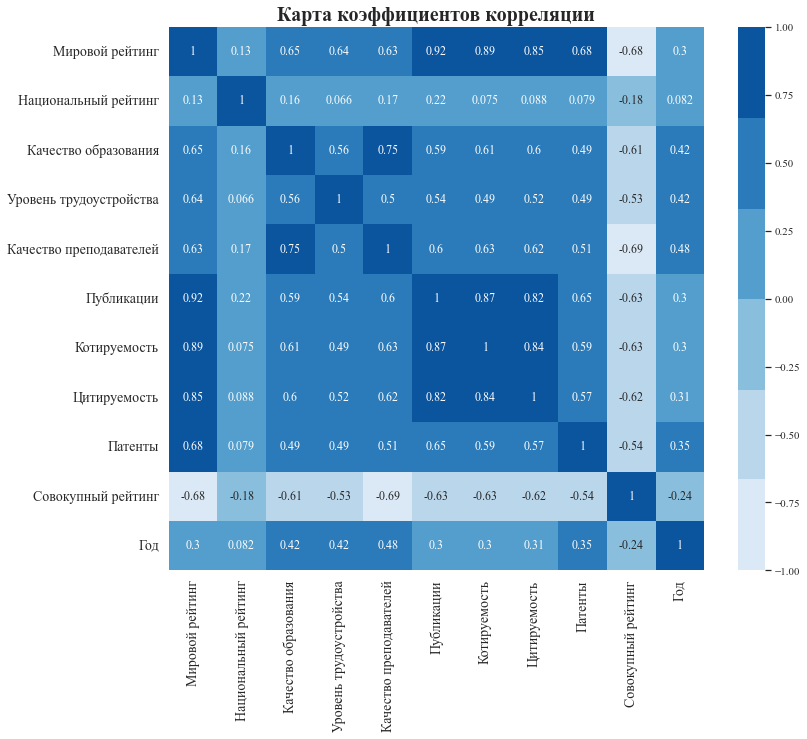

In [32]:
colormap = sns.color_palette('Blues')
plt.figure(figsize = (12,10))
plt.title('Карта коэффициентов корреляции', fontsize = 20, font = 'Times New Roman', fontweight = 'bold')
plt.tick_params(labelsize = 14)
sns.heatmap(df_uni.corr(), annot=True, alpha = 1, vmin = -1, vmax = 1, center = 0, cmap = colormap)

К тепловой карте применил цветовую карту Blues, для того, чтобы более явно отсеять менее значащие коэффициенты корреляции.

Создадим новый датафрейм из количественных переменных.

In [33]:
quantitative = ['Мировой рейтинг', 'Национальный рейтинг', 'Качество образования', 'Уровень трудоустройства',
                'Качество преподавателей', 'Публикации', 'Котируемость', 'Цитируемость', 'Патенты',
                'Совокупный рейтинг', 'Год']

На основе датафрейма построим матрицу корреляционного распределения данных.

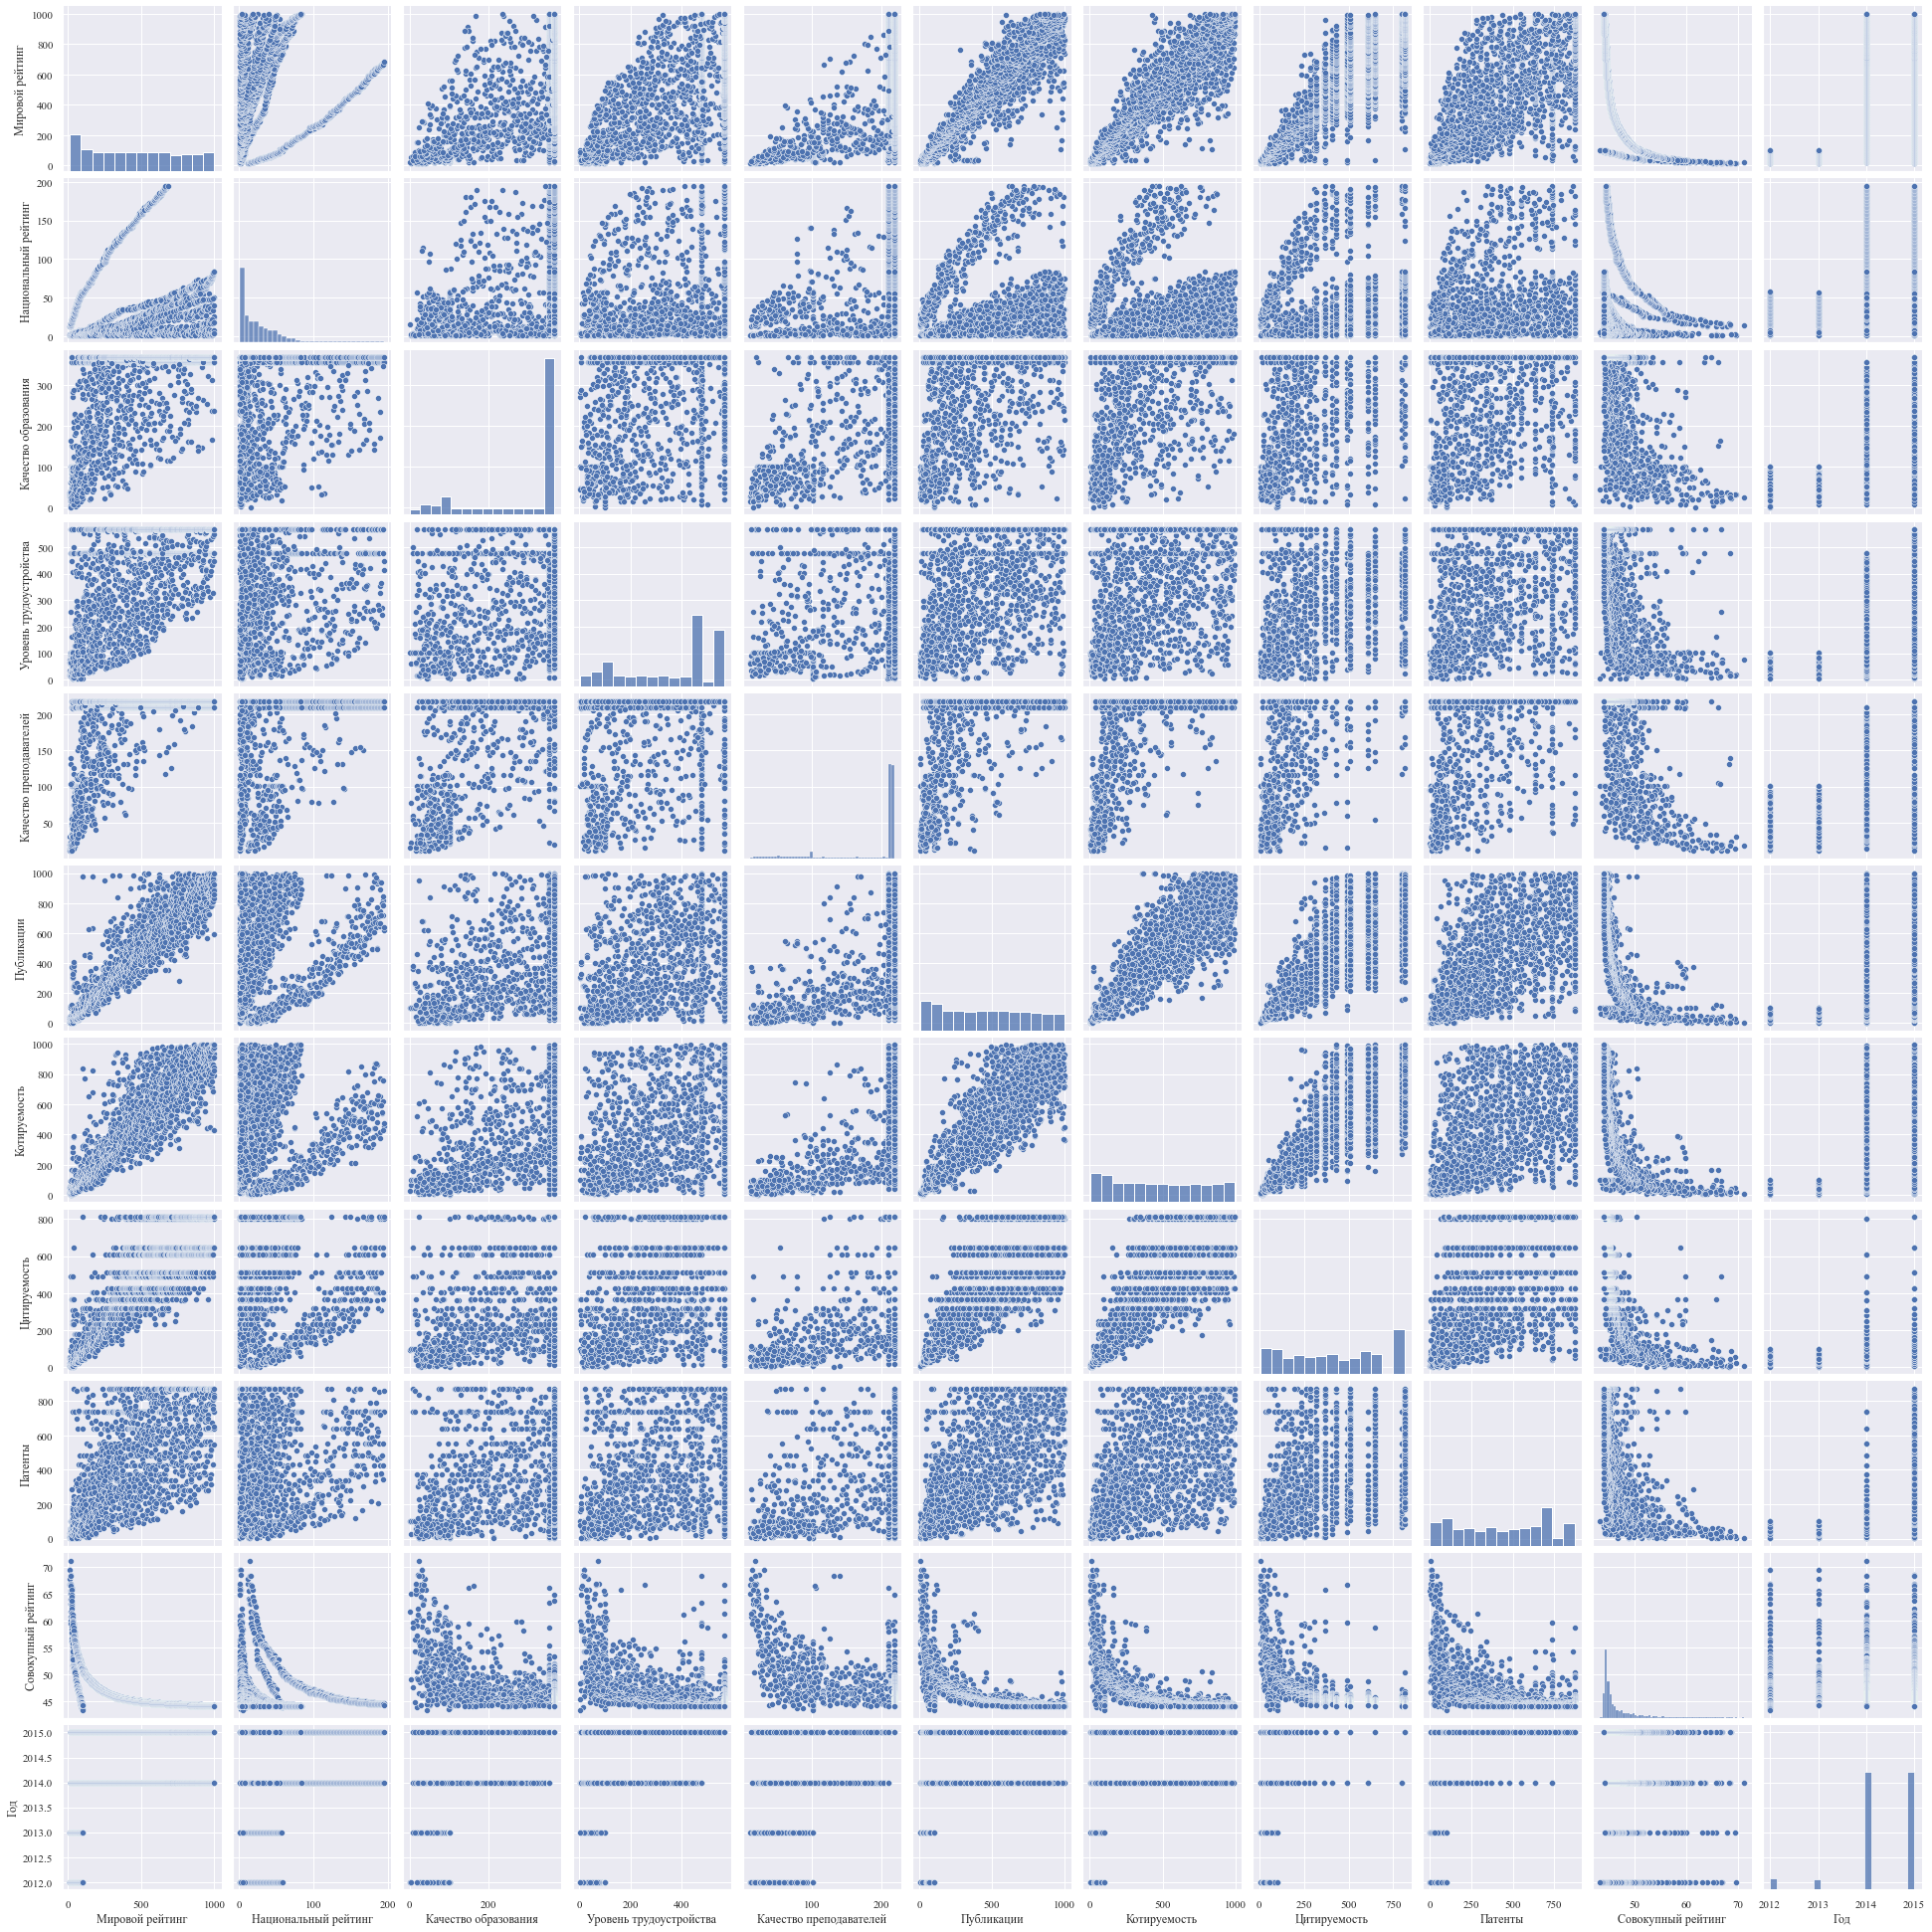

In [34]:
sns.pairplot(df_uni[quantitative])

Исходя из графиков выше, можно отметить, что мультиколленеарность отсуствует. Это говорит о том, что мы можем делать выводы на основе тепловой карты взаимосвязи переменных.

In [35]:
df_uni['Патенты'].shape

(2071,)

**Выводы**

На мировой рейтинг вузов представленных в датасете больше всего влияет:
- Уровень публикаций вуза
- Уровень котируемости
- Уровень цитируемости
- Количество патентов

Интересно отметить, что внешнее отношение к вузу а также качество его инфополя в медиапространстве больше влияет на мировой рейтинг, нежели:
- Качество образования
- Качество преподавателей
- Уровень трудоустройства выпускников

Из более очевидных выводов можно отметить, что качество образования больше всего зависит от качества преподавателей. А уровень котируемости вуза зависит больше от частоты цитируемости научных исследований, проведенных в вузе.

С учетом корректировки выбросов в датасете, объем строк был уменьшен с 2200 до 2071 строки.